# Problem definition

The this notebook we're trying to forecast Nextbike's revenue for the next period of time.

As of day of writing, we have available data for only full 4 months (Jul - Oct 2019), thus it would be hard to precisely forecast revenue for other months. It makes more sense to forcast for next week or even day.

## Import libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd

# let matplotlib plots be part of Jupyter Notebook
%matplotlib inline

# set up higher resolution for matplotlib plots
%config InlineBackend.figure_format = 'retina'

## Load and inspect data

In [2]:
filepath = os.path.join(os.getcwd(), '..', 'data', 'processed', 'bike_rentals_soft.csv')

In [3]:
# load data with hard deleted records
bike_rentals_df = pd.read_csv(filepath)
bike_rentals_df['Rental datetime'] = pd.to_datetime(bike_rentals_df['Rental datetime'])
bike_rentals_df['Return datetime'] = pd.to_datetime(bike_rentals_df['Return datetime'])
bike_rentals_df['Duration'] = pd.to_timedelta(bike_rentals_df['Duration'])

In [4]:
bike_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480640 entries, 0 to 480639
Data columns (total 18 columns):
Bike number                 480640 non-null int64
Rental datetime             480640 non-null datetime64[ns]
Return datetime             480640 non-null datetime64[ns]
Rental station              480640 non-null object
Return station              480640 non-null object
Duration                    480640 non-null timedelta64[ns]
Rental station latitude     446274 non-null float64
Rental station longitude    446274 non-null float64
Return station latitude     449682 non-null float64
Return station longitude    449682 non-null float64
IsDeleted                   480640 non-null bool
Season                      480640 non-null int64
Holidays                    480640 non-null bool
Rental day of week          480640 non-null int64
Rental hour                 480640 non-null int64
Rental month                480640 non-null int64
Distance                    421295 non-null float64
R

In [5]:
bike_rentals_df.head()

,Bike number,Rental datetime,Return datetime,Rental station,Return station,Duration,Rental station latitude,Rental station longitude,Return station latitude,Return station longitude,IsDeleted,Season,Holidays,Rental day of week,Rental hour,Rental month,Distance,Rental fee
0,57719,2019-06-26 00:00:10,2019-06-26 00:06:19,Skarbowców / Wietrzna,Krzycka / Aleja Karkonoska (Park Południowy),00:06:09,51.073290,16.994850,51.074992,17.007058,False,3,False,3,0,6,0.9,0.0
1,650480,2019-06-26 00:00:13,2019-06-26 00:06:59,Rynek,Plac Legionów,00:06:46,51.109782,17.030175,51.104413,17.022536,False,3,False,3,0,6,0.8,0.0
2,650988,2019-06-26 00:00:15,2019-06-26 00:13:32,Poza oficjalną stacją,Wałbrzyska - pętla tramwajowa,00:13:17,NaN,NaN,51.065777,16.988575,True,3,False,3,0,6,NaN,0.0
3,57603,2019-06-26 00:00:21,2019-06-26 00:23:53,Plac Uniwersytecki (UWr),Legnicka / Wejherowska,00:23:32,51.113871,17.034484,51.125276,16.984447,False,3,False,3,0,6,3.7,2.0
4,650067,2019-06-26 00:00:40,2019-06-26 00:04:40,Powstańców Śląskich (Arkady Wrocławskie),Powstańców Śląskich (Arkady Wrocławskie),00:04:00,51.099713,17.027905,51.099713,17.027905,True,3,False,3,0,6,0.0,0.0


## Resample

In [6]:
df = bike_rentals_df[['Rental datetime', 'Rental fee']]

df = df.set_index('Rental datetime')
daily_rentals = df.resample('D').agg(['sum', 'count'])
daily_rentals

Rental fee       
                       sum  count
Rental datetime                  
2019-06-26          9052.0  12887
2019-06-27             0.0      0
2019-06-28             0.0      0
2019-06-29             0.0      0
2019-06-30             0.0      0
...                    ...    ...
2019-11-03          1516.0   2794
2019-11-04             0.0      0
2019-11-05           984.0   5183
2019-11-06          1046.0   5721
2019-11-07          1066.0   5537

[135 rows x 2 columns]

In [7]:
nb_missing_days = daily_rentals[daily_rentals['Rental fee']['sum'] == 0].shape[0]
print(f"There are {nb_missing_days} days "
      f"({(nb_missing_days*100/daily_rentals.shape[0]):.2f}%) with no records.")

There are 68 days (50.37%) with no records.


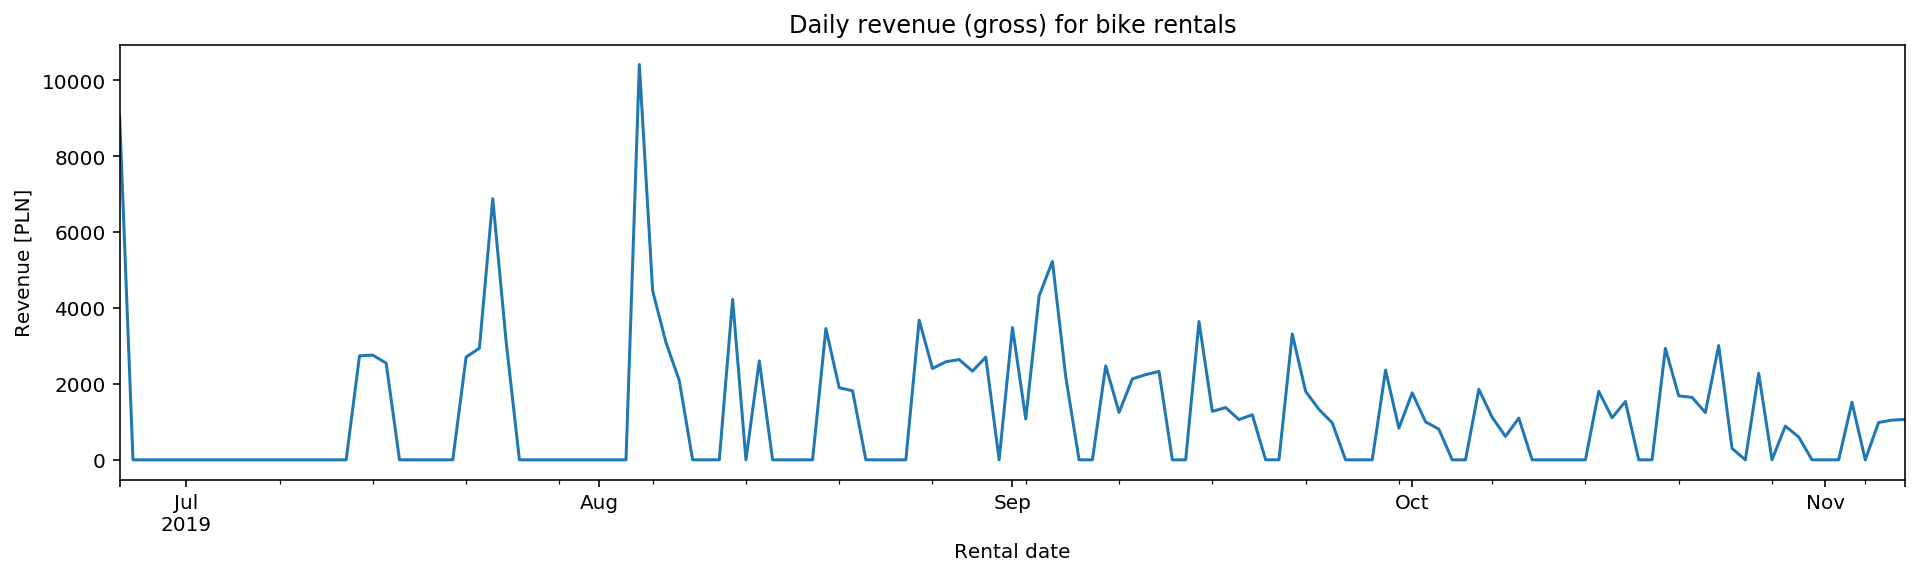

In [8]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,1,1)

daily_rentals['Rental fee']['sum'].plot(ax=ax)

ax.set_title('Daily revenue (gross) for bike rentals')
ax.set_xlabel('Rental date')
ax.set_ylabel('Revenue [PLN]');

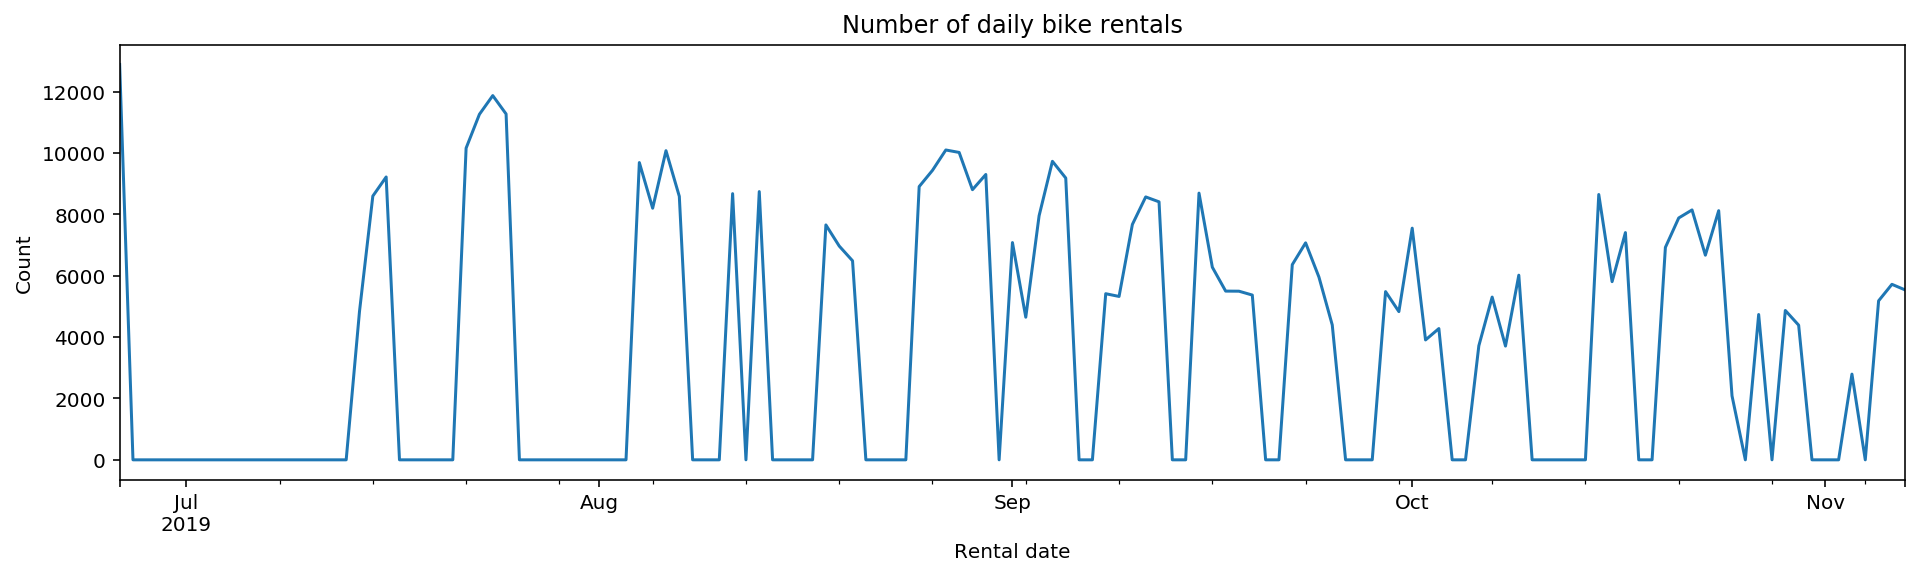

In [9]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,1,1)

daily_rentals['Rental fee']['count'].plot(ax=ax)

ax.set_title('Number of daily bike rentals')
ax.set_xlabel('Rental date')
ax.set_ylabel('Count');